# import the dependencies

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from keras.datasets import mnist
from keras import metrics
import matplotlib.pyplot as plt


# upload the dataset

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
x_train[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

# scale the x_train and y_train, dividing by 255

In [6]:
x_train = x_train / 250
x_test = x_test / 250

In [7]:
x_train[0]

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   

In [8]:
y_train.shape, x_train.shape

((60000,), (60000, 28, 28))

In [9]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

# add another dimension for x_train and x_test

In [10]:
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

# create the model using keras

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(30,5, activation = 'relu',input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(30,5, activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'softmax',)

])

In [12]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
          
)

In [13]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode = 'auto',    
    min_delta = 0,
    patience = 2,
    verbose = 0, 
    restore_best_weights = True
)

In [14]:
model.fit(
    x_train,
    y_train,
    batch_size = 50,
    epochs = 10,
    callbacks = [early_stopping],
     )


Epoch 1/10
1200/1200 [==============================] - 37s 25ms/step - loss: 0.1903 - accuracy: 0.9440
Epoch 2/10
1200/1200 [==============================] - 31s 26ms/step - loss: 0.0569 - accuracy: 0.9821
Epoch 3/10
1200/1200 [==============================] - 32s 26ms/step - loss: 0.0410 - accuracy: 0.9882
Epoch 4/10
1200/1200 [==============================] - 32s 27ms/step - loss: 0.0318 - accuracy: 0.9898
Epoch 5/10
1200/1200 [==============================] - 33s 27ms/step - loss: 0.0262 - accuracy: 0.9919
Epoch 6/10
1200/1200 [==============================] - 33s 27ms/step - loss: 0.0230 - accuracy: 0.9929
Epoch 7/10
1200/1200 [==============================] - 34s 28ms/step - loss: 0.0185 - accuracy: 0.9942
Epoch 8/10
1200/1200 [==============================] - 33s 28ms/step - loss: 0.0154 - accuracy: 0.9952
Epoch 9/10
1200/1200 [==============================] - 33s 27ms/step - loss: 0.0129 - accuracy: 0.9960
Epoch 10/10
1200/1200 [==============================] - 33s 28m

In [16]:
y_predicted = model.predict(x_train)

In [17]:
y_predicted[0]

array([4.3510554e-17, 2.0360992e-14, 1.6163050e-16, 1.2022520e-03,
       2.4010224e-16, 9.9879777e-01, 1.0990589e-15, 3.4740905e-16,
       1.7629680e-10, 3.5029254e-10], dtype=float32)

In [18]:
y_train[0]

5

In [19]:
y_predicted[222]

array([4.9192844e-15, 1.6629260e-06, 4.3156920e-08, 7.8553192e-10,
       9.9989760e-01, 1.0055844e-06, 3.1946347e-06, 2.0947135e-11,
       6.4177632e-09, 9.6547345e-05], dtype=float32)

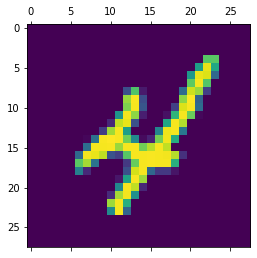

In [27]:
plt.matshow(x_train[9])

In [28]:
np.argmax(y_predicted[9])

4

In [29]:
model.fit(
    x_test,
    y_test,
    batch_size = 50,
    epochs = 10,
    callbacks = [early_stopping],
     )

Epoch 1/10
200/200 [==============================] - 6s 25ms/step - loss: 0.0326 - accuracy: 0.9893
Epoch 2/10
200/200 [==============================] - 5s 26ms/step - loss: 0.0099 - accuracy: 0.9969
Epoch 3/10
200/200 [==============================] - 5s 23ms/step - loss: 0.0048 - accuracy: 0.9986
Epoch 4/10
200/200 [==============================] - 5s 26ms/step - loss: 0.0023 - accuracy: 0.9997
Epoch 5/10
200/200 [==============================] - 5s 26ms/step - loss: 0.0011 - accuracy: 0.9999
Epoch 6/10
200/200 [==============================] - 6s 32ms/step - loss: 7.4044e-04 - accuracy: 1.0000
Epoch 7/10
200/200 [==============================] - 6s 28ms/step - loss: 5.1034e-04 - accuracy: 1.0000
Epoch 8/10
200/200 [==============================] - 6s 28ms/step - loss: 3.5435e-04 - accuracy: 1.0000
Epoch 9/10
200/200 [==============================] - 6s 29ms/step - loss: 2.9118e-04 - accuracy: 1.0000
Epoch 10/10
200/200 [==============================] - 6s 29ms/step - loss:

In [30]:
predictions = model.predict(x_test)
predictions.shape
new_predictions = np.argmax(predictions, axis=1)
new_predictions = pd.Series(new_predictions)

print(new_predictions.shape)

(10000,)
